## Dependencies

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Dataset, Visualization

In [2]:
! wget -c "https://static.oc-static.com/prod/courses/files/initiez-vous-au-machine-learning/house_data.csv"

--2021-09-09 11:35:17--  https://static.oc-static.com/prod/courses/files/initiez-vous-au-machine-learning/house_data.csv
Resolving static.oc-static.com (static.oc-static.com)... 104.21.27.218, 172.67.169.198, 2606:4700:3031::ac43:a9c6, ...
Connecting to static.oc-static.com (static.oc-static.com)|104.21.27.218|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [3]:
# Load dataset
raw_data = pd.read_csv("house_data.csv")

In [4]:
# Overview of raw data
raw_data.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [5]:
# Remove missing values
data_na = raw_data.dropna()

# Remove outliers
data = data_na[data_na["price"] < 8000]

# Reindexing
data = data.reset_index(drop = True)

<AxesSubplot:xlabel='price', ylabel='surface'>

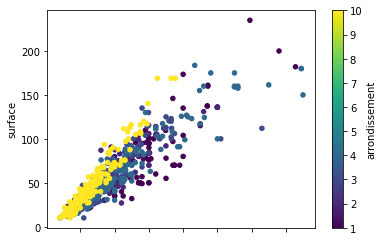

In [6]:
# Display cleaned data
data.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')

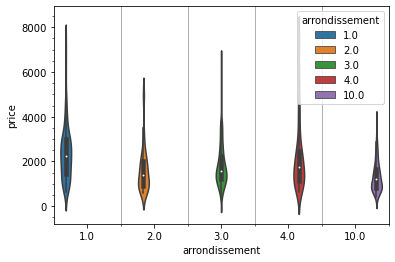

In [26]:
# Price according to the "arrondissement" (district)
ax1 = sns.violinplot(x = 'arrondissement', y = 'price', data = data, hue = 'arrondissement') # combination of boxplot and kernel density estimate.
ax1.minorticks_on() # Enable minor tickers ("micro-graduations")
ax1.xaxis.set_minor_locator(AutoMinorLocator(n = 2)) # Set 2 minor tickers instead of the default value (5)
ax1.grid(which='minor', axis='x', linewidth=1) # Add grid at minor tickers


The price distribution seems similar albeit prices are lower in the 10th arrondissement

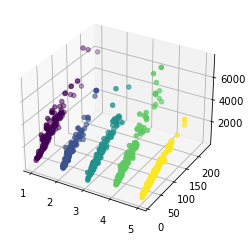

In [27]:
fig = plt.figure().gca(projection='3d')

# To make visualization easier, we change the value of the "arrondissement" (10 -> 5)
tmp_arr = data['arrondissement'][:] # Retrieve "arrondissement" column
tmp_arr[tmp_arr == 10] = 5  

fig.scatter(tmp_arr, data['surface'], data['price'], c=tmp_arr, cmap="viridis") # display the 3 columns with a scatter in 3D
plt.show()

We will do a linear regression on each district. Before that, we separate the dataset into a training set and a test set. We first do a linear regression on all "arrondissements"

## Linear Regression on all arrondissements

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(data[["arrondissement", "surface"]], data[["price"]], test_size=0.3)

Then, we do the linear regression. To measure its accuracy, we use the coefficient of determination (R²).

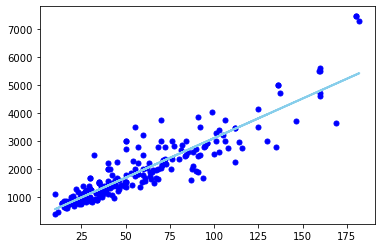

In [38]:
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain) # surface and price
baseline_pred = lr.predict(xtest[["surface"]]) # predicted prices

plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5) # test set point cloud
plt.plot(xtest[["surface"]], baseline_pred, color="skyblue", linewidth = 2) # prediction (result of the linear regression)

In [47]:
score = r2_score(ytest['price'], baseline_pred[:,0])
print(score)

0.8309046991949871


## Linear Regression for each "arrondissement" (district)

In [53]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    # A data set for each "arrondissement"
    train_arr = xtrain["arrondissement"] == i # Series of booleans for selecting rows in the DataFrame
    test_arr = xtest["arrondissement"] == i
    
    # Training set
    xtrain_arr = xtrain[train_arr] # arrondissements, surfaces (features)
    ytrain_arr = ytrain[train_arr] # prices (label)
    
    # Test set
    xtest_arr = xtest[test_arr] # arrondissements, surfaces (features)
    ytest_arr = ytest[test_arr] # known prices to compare with predictions
    
    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

## Final Prediction / Evaluation

In [74]:
final_pred = []

for idx, val in xtest.iterrows(): # returns (index, Series)
    # apply a price prediction on a surface value from a "arrondissement" (district) 
    # with the corresponding linear regression model.
    # predict() expects a 2D-Array and we retrieve only the first element
    pred = lrs[int(val["arrondissement"]-1)].predict( [[val["surface"]]] )[0][0] 
    
    final_pred.append(pred)
    
    print("Surface: %f" % val["surface"])
    print("Price prediction: %f" % pred)
    
print("R² score: " + str(r2_score(ytest['price'], final_pred))) 

Surface: 130.000000
Price prediction: 4104.186597
Surface: 40.000000
Price prediction: 1417.668685
Surface: 160.000000
Price prediction: 5116.003063
Surface: 116.000000
Price prediction: 2712.652324
Surface: 103.000000
Price prediction: 3390.481750
Surface: 21.000000
Price prediction: 789.245806
Surface: 35.000000
Price prediction: 1268.417690
Surface: 40.000000
Price prediction: 1445.720893
Surface: 22.000000
Price prediction: 809.492191
Surface: 30.000000
Price prediction: 971.463266
Surface: 12.000000
Price prediction: 607.028347
Surface: 15.000000
Price prediction: 667.767500
Surface: 91.000000
Price prediction: 3027.214105
Surface: 136.000000
Price prediction: 4433.381962
Surface: 99.000000
Price prediction: 3269.392535
Surface: 16.430000
Price prediction: 712.187858
Surface: 55.000000
Price prediction: 2009.854288
Surface: 30.000000
Price prediction: 1119.166694
Surface: 20.000000
Price prediction: 820.664704
Surface: 108.000000
Price prediction: 2550.681249
Surface: 103.000000
P

## Plots

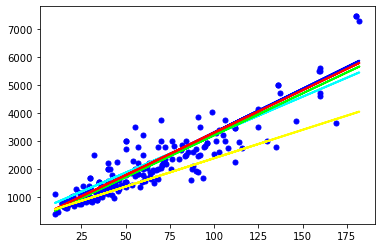

In [75]:
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color = "#00FFFF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color = "#0000FF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color = "#00FF00", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color = "#FF0000", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color = "#FFFF00", linewidth = 2)

Other features might be added to improve the model:
- Distance from schools
- Geolocalization (lat, long) to use Knn
- new/old
- ...